In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from FS.ssa import jfs   # change this to switch algorithm 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from IPython.display import display
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
from skrebate import ReliefF
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from datetime import datetime as dt
import time
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [2]:
Df = pd.read_csv("Datasets/colon_cancer.csv")

In [3]:
Df.head(5)

,samples,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000,response
0,1,3.622527,3.308826,2.986154,2.710537,2.091310,3.119126,2.745517,2.421422,3.352726,...,-1.026668,-0.983356,-0.531104,-1.142698,-1.108899,-0.520386,-0.314519,-1.764190,-2.749956,normal
1,2,3.470277,3.681609,3.425553,3.046109,2.402400,2.460531,2.150405,2.256655,3.020793,...,-1.232504,-3.063926,0.156281,-0.687025,-0.777089,-1.093455,-1.213857,-1.062064,-2.126398,normal
2,3,3.018884,2.783578,2.569772,3.211390,2.707560,2.632832,2.385288,3.001862,2.633958,...,-0.757976,0.318488,-1.251425,-1.099859,-0.130810,-2.748068,-1.014786,-2.260031,-1.496573,normal
3,4,3.097915,2.863956,2.772942,3.186238,2.354082,2.758829,2.103475,2.932663,3.176524,...,-1.175068,0.079492,-1.074746,-0.465491,-0.454513,-1.804783,-1.606205,-1.223450,-1.066161,normal
4,5,3.007979,2.905384,2.560548,3.253039,2.336800,3.040030,2.881109,2.548497,2.852425,...,-0.490512,-0.081214,-1.155846,-0.889998,-0.527681,-1.636024,-1.210256,-1.232686,-1.618022,normal


In [4]:
Df.isnull().sum()
Df.dtypes

samples       int64
V1          float64
V2          float64
V3          float64
V4          float64
             ...   
V1997       float64
V1998       float64
V1999       float64
V2000       float64
response     object
Length: 2002, dtype: object

In [5]:
Df.shape

(62, 2002)

In [6]:
Df.isna().sum()

samples     0
V1          0
V2          0
V3          0
V4          0
           ..
V1997       0
V1998       0
V1999       0
V2000       0
response    0
Length: 2002, dtype: int64

In [7]:
Df = Df.fillna(Df.mean())

C:\Users\ISUWA JEREMIAH\AppData\Local\Temp\ipykernel_15384\83483696.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Df = Df.fillna(Df.mean())


In [8]:
Df.value_counts('response')

response
tumer     40
normal    22
dtype: int64

In [9]:
Df['response'] = LabelEncoder().fit_transform(Df['response'])
Df

,samples,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000,response
0,1,3.622527,3.308826,2.986154,2.710537,2.091310,3.119126,2.745517,2.421422,3.352726,...,-1.026668,-0.983356,-0.531104,-1.142698,-1.108899,-0.520386,-0.314519,-1.764190,-2.749956,0
1,2,3.470277,3.681609,3.425553,3.046109,2.402400,2.460531,2.150405,2.256655,3.020793,...,-1.232504,-3.063926,0.156281,-0.687025,-0.777089,-1.093455,-1.213857,-1.062064,-2.126398,0
2,3,3.018884,2.783578,2.569772,3.211390,2.707560,2.632832,2.385288,3.001862,2.633958,...,-0.757976,0.318488,-1.251425,-1.099859,-0.130810,-2.748068,-1.014786,-2.260031,-1.496573,0
3,4,3.097915,2.863956,2.772942,3.186238,2.354082,2.758829,2.103475,2.932663,3.176524,...,-1.175068,0.079492,-1.074746,-0.465491,-0.454513,-1.804783,-1.606205,-1.223450,-1.066161,0
4,5,3.007979,2.905384,2.560548,3.253039,2.336800,3.040030,2.881109,2.548497,2.852425,...,-0.490512,-0.081214,-1.155846,-0.889998,-0.527681,-1.636024,-1.210256,-1.232686,-1.618022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,3.458313,3.300057,3.183344,2.414429,2.416091,3.132199,2.681662,2.395896,2.582450,...,-2.553492,0.330376,-0.130772,-0.201221,-0.116515,-1.127999,-0.580251,-1.854906,-2.108392,1
58,59,3.292722,3.036032,2.919174,2.348794,2.732307,3.477663,2.969739,2.625833,2.694350,...,-1.623482,0.379994,-0.860314,-1.162912,-0.390431,-2.851668,-0.654357,-2.010479,-1.720458,1
59,60,3.427067,3.290822,3.043461,2.987181,1.887169,3.367934,2.561288,2.670872,3.074067,...,-1.180208,-0.315230,-0.758786,-0.766010,-1.835627,-0.372652,-0.745123,-1.341634,-2.125245,1
60,61,3.548026,3.111441,2.856634,2.884745,2.319726,3.095435,2.435996,2.079020,2.802260,...,-0.686787,0.186172,-0.744081,-0.483135,0.055639,-0.896491,-0.364456,-1.632671,-1.968168,1


In [10]:
Df = Df.apply(pd.to_numeric)

In [11]:
Df1 = Df.copy()

In [12]:
x = Df1.drop(['response'], axis = 1)

In [13]:
y = Df.loc[:,['response']]

In [14]:
scaler = StandardScaler()
xs = scaler.fit_transform(x)
xs = np.abs(xs)

In [15]:
fitt = SelectKBest(score_func = mutual_info_classif, k = 50)
fitt.fit(xs,y)

C:\Users\ISUWA JEREMIAH\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=50,
            score_func=<function mutual_info_classif at 0x0000023B7252FEE0>)

In [16]:
TabelScores = pd.DataFrame(fitt.scores_)
TabelFeatures = pd.DataFrame(x.columns)
GeneralTable = pd.concat([TabelFeatures,TabelScores], axis = 1)
GeneralTable.columns = ['Features', 'scores']

In [17]:
GeneralTable.sort_values(by = 'scores', ascending = False)

,Features,scores
1227,V1227,0.229143
1224,V1224,0.211553
531,V531,0.201289
203,V203,0.195491
328,V328,0.178959
...,...,...
1264,V1264,0.000000
1265,V1265,0.000000
1266,V1266,0.000000
1268,V1268,0.000000


In [18]:
xs = fitt.transform(xs)

In [19]:
y = y.values

In [20]:
xs.shape

(62, 50)

In [21]:
#We now split our data into traning and testing sets (70:30)
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size = 0.3 , stratify = y)
fold = {'xt': x_train, 'yt': y_train, 'xv': x_test, 'yv': y_test}

In [22]:
#Now we set our parameters
K = 5 #K value in KNN
N = 20 #Population size
T = 20 #Max iter
options = {'k': K, 'fold': fold, 'N': N, 'T': T}

'''
## Firefly Algorithm (FA)
#FA contains 4 extra parameters

alpha  = 1       # constant
beta0  = 1       # light amplitude
gamma  = 1       # absorbtion coefficient
theta  = 0.97    # control alpha
options = {'k':K, 'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}'''

"\n## Firefly Algorithm (FA)\n#FA contains 4 extra parameters\n\nalpha  = 1       # constant\nbeta0  = 1       # light amplitude\ngamma  = 1       # absorbtion coefficient\ntheta  = 0.97    # control alpha\noptions = {'k':K, 'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}"

In [23]:
#Now we perform our feature selection by calling the module jfs
fmdl = jfs(xs, y, options) #feature selection model
sf = fmdl['sf'] #index of selected features

Iteration: 1
Best (SSA): 0.2651263157894737
Iteration: 2
Best (SSA): 0.16111578947368427
Iteration: 3
Best (SSA): 0.16091578947368426
Iteration: 4
Best (SSA): 0.16091578947368426
Iteration: 5
Best (SSA): 0.16091578947368426
Iteration: 6
Best (SSA): 0.16091578947368426
Iteration: 7
Best (SSA): 0.16091578947368426
Iteration: 8
Best (SSA): 0.16091578947368426
Iteration: 9
Best (SSA): 0.16091578947368426
Iteration: 10
Best (SSA): 0.16091578947368426
Iteration: 11
Best (SSA): 0.16091578947368426
Iteration: 12
Best (SSA): 0.16091578947368426
Iteration: 13
Best (SSA): 0.16071578947368428
Iteration: 14
Best (SSA): 0.16071578947368428
Iteration: 15
Best (SSA): 0.16071578947368428
Iteration: 16
Best (SSA): 0.16071578947368428
Iteration: 17
Best (SSA): 0.16071578947368428
Iteration: 18
Best (SSA): 0.16071578947368428
Iteration: 19
Best (SSA): 0.16071578947368428
Iteration: 20
Best (SSA): 0.16071578947368428


In [24]:
print(sf)

[ 0  1  5  6  8 10 12 14 15 17 18 19 22 26 27 28 30 37 39 45 46 49]


In [25]:
#Model with selected features
num_train = np.size(x_train,0)#checks the number of samples slected in the x_train and assign to num_train
num_test = np.size(x_test, 0)#checks the number of samples slected in the x_test and assign to num_train
xtrain = x_train[:,sf]
ytrain = y_train.reshape(num_train)
xtest = x_test[:,sf]
ytest = y_test.reshape(num_test) #I suffered fixing the bug

In [26]:
#Now we build our model i.e., the classifier
model = KNeighborsClassifier(n_neighbors = 5) 
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [27]:
#Calculating for accuracy
y_pred = model.predict(xtest)
acc = accuracy_score(ytest, y_pred)


end = dt.now()
#print('Total duration of time is: ', str(end - start))

print('The accuracy is: ', round(acc, 2))

The accuracy is:  0.84


In [28]:
#Now we check the number of selected features
Nfea = len(sf)
print("The number of selected features is: ", str(Nfea))

The number of selected features is:  22


In [29]:
f_mea = classification_report(ytest, y_pred)
print(f_mea)

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.80      1.00      0.89        12

    accuracy                           0.84        19
   macro avg       0.90      0.79      0.81        19
weighted avg       0.87      0.84      0.83        19



In [30]:
cm = confusion_matrix(ytest, y_pred)

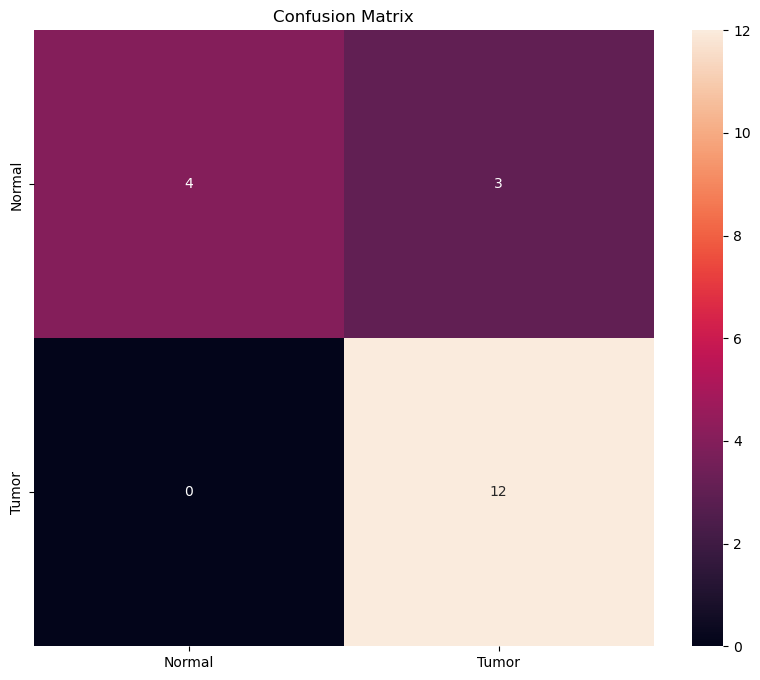

In [31]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, annot = True, fmt="d", xticklabels=["Normal", "Tumor"], 
                 yticklabels=["Normal", "Tumor"])
ax.set(title="Confusion Matrix");

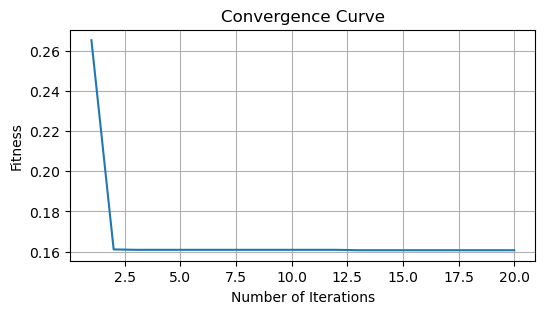

In [32]:

curve = fmdl['c']
curve = curve.reshape(np.size(curve, 1))
x = np.arange(0,options['T'], 1.0)+1.0

Fig, ax = plt.subplots(figsize = (6,3))
#ax.plot(x, curve, 'o-')
plt.plot(x, curve)
plt.xlabel('Number of Iterations', fontsize = 10)
plt.ylabel('Fitness', fontsize = 10)
plt.title('Convergence Curve', fontsize = 12)
plt.grid()
plt.show()